# TP de AA


Primero vamos a importar todas las librerías para poder levantar y correr nuestro modelo

In [150]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# we'll want this for plotting
import matplotlib.pyplot as plt

# we'll want this for text manipulation
import re

# for quick and dirty counting
from collections import defaultdict

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer
# function for encoding categories
from sklearn.preprocessing import LabelEncoder
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer

Levanto el Archivo

In [156]:
twigen = pd.read_csv("gender-classifier-DFE-791531.csv", encoding='latin1')
twigen.head()
Comp_Dataset = twigen.sample(n=500, replace=True)
print(len(twigen))
print(len(Comp_Dataset))

20050
500


Veo cuantas filas, tengo el sex = Unkwnown

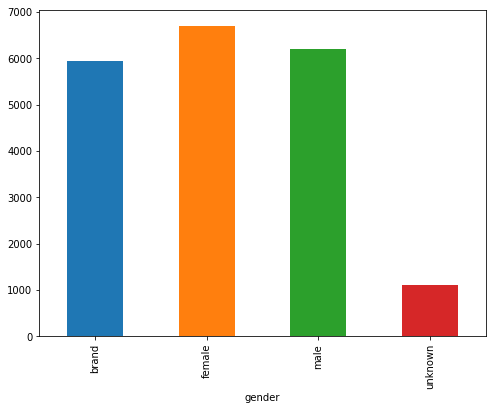

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
twigen.groupby('gender').text.count().plot.bar(ylim=0)
plt.show()

Entonces, borro esos que son Unknown

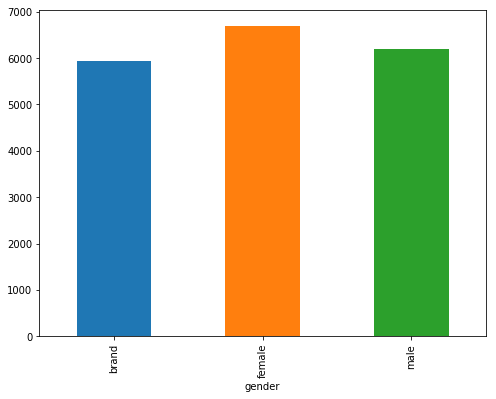

In [158]:
tweets = twigen[twigen['gender'] != 'unknown']
fig = plt.figure(figsize=(8,6))
tweets.groupby('gender').text.count().plot.bar(ylim=0)
plt.show()

In [162]:
tweets = tweets.dropna(subset=['gender'])
tweets['gender'].unique()

array(['male', 'female', 'brand'], dtype=object)

Concateno el texto de la descripción, con el texto del tweet

In [170]:
 enc = preprocessing.LabelBinarizer()
enc.fit(tweets['sidebar_color'])  
len(enc.classes_)


545

In [98]:
tweets['both'] = tweets['description'] + tweets['text']


Chequeo el resultado

In [99]:
tweets['both']

0        i sing my own rhythm.Robbie E Responds To Crit...
1        I'm the author of novels filled with family dr...
2        louis whining and squealing and alli absolutel...
3        Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4        Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5        you don't know me.Ive seen people on the train...
6        A global marketplace for images, videos and mu...
7        The secret of getting ahead is getting started...
8        Pll Fan // Crazy about MCD // Ramen is bae@_Ap...
9        Renaissance art historian, University of Notti...
10       Clean food that tastes great while providing e...
11       highly extraordinary auctionsMTG Deals 1x Rank...
12       Senior '16 . XI-XII-MMXIV.Just put my ass on t...
13       Come join the fastest blog network online toda...
14       im just here for tÌüp, bo burnham, and disney ...
15                                                     NaN
16       JMKM_Òü@giannaaa28 lmao _Ù÷â_Ù÷â dude I'm h.

Normalizo el texto

In [100]:
def normalize_text(s):
    # just in case
    s = str(s)
    s = s.lower()
    
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    
    # make sure we didn't introduce any double spaces
    s = re.sub('\s+',' ',s)
    
    return s

tweets['both'] = [normalize_text(s) for s in tweets['text']]

Limpio el texto

In [101]:
def remove_stopwords(s):
    t = ' '
    u = ' '
    v = ' '
    ps = PorterStemmer()
    printable = set(string.printable)
    punctuation = set(string.punctuation)
    for palabra in s.split():
        if palabra.lower() not in stopwords.words('english'):
            t += ' ' + palabra.lower()
    u = re.sub(r"http\S+", "", t)
    u = re.sub(r'[^\w\s]','',u)
    for word in u.split():
        v += ' ' + ps.stem(word)
    v.strip()
    return v

tweets['text_swords'] = tweets['both'].apply(remove_stopwords)

In [102]:
tweets['text_swords']

0          robbi e respond critic win eddi edward world...
1          ûïit felt like friend live stori themû retir...
2          absolut ador loui start song hit hard feel good
3          hi jordanspieth look url use ifttt typic see...
4          watch neighbour sky catch neighb xxx _ùä_ùä_...
5                   ive seen peopl train lamp chair tv etc
6                  bpackengin thank patienc take care issu
7          gala bingo club bought å241m uk largest high...
8          _aphmau_ pic defin mcd fangirlsfanboy mcd sh...
9          evieladi love tree year never seen gorgeou a...
10                                    take care fitfluenti
11         mtg deal 1x rankupmag seventh one prioen058 ...
12                                   put ass line repay me
13                    nation talk wednesday gop debat busi
14                    even need sound effect divin tonight
15                                     glow satisfact glow
16         giannaaa28 lmao _ùâ_ùâ dude im hella scare n.

Label Encoder para los Gender

In [103]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(tweets['gender'])
list(le.classes_)


['brand', 'female', 'male']

In [104]:
tweets['gender'] = le.transform(tweets['gender']) 
tweets['gender']

0        2
1        2
2        2
3        2
4        1
5        1
6        0
7        2
8        1
9        1
10       0
11       0
12       1
13       0
14       1
15       1
16       1
17       2
18       2
20       1
21       1
22       1
23       2
24       2
25       1
26       0
27       0
28       1
29       2
30       0
        ..
20020    0
20021    2
20022    2
20023    2
20024    0
20025    0
20026    2
20027    2
20028    1
20029    0
20030    0
20031    2
20032    2
20033    1
20034    0
20035    1
20036    1
20037    2
20038    0
20039    1
20040    2
20041    0
20042    0
20043    2
20044    1
20045    1
20046    2
20047    2
20048    1
20049    1
Name: gender, Length: 18836, dtype: int64

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(tweets['text_swords']).toarray()
labels = tweets.gender
print(features.shape)
print(labels.shape)

(18836, 5227)
(18836,)


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(tweets['text_swords'], tweets['gender'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

RandomForestClassifier
LinearSVC
MultinomialNB
LogisticRegression


C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

Perceptron


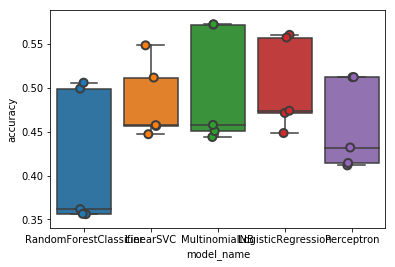

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    Perceptron(n_iter=50)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  print(model_name)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [117]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.484336
LogisticRegression        0.502387
MultinomialNB             0.499466
Perceptron                0.456518
RandomForestClassifier    0.415848
Name: accuracy, dtype: float64

RandomForestClassifier


C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

PassiveAggressiveClassifier


C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

SGDClassifier
BernoulliNB


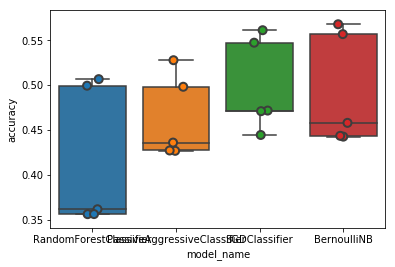

In [118]:
from sklearn.tree import DecisionTreeClassifier
models = [
    RandomForestClassifier(n_estimators=200, max_depth=4, random_state=0),
    PassiveAggressiveClassifier(n_iter=50),
    SGDClassifier(alpha=.0001, n_iter=50),
    BernoulliNB(alpha=.01)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  print(model_name)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [119]:
cv_df.groupby('model_name').accuracy.mean()

model_name
BernoulliNB                    0.493838
PassiveAggressiveClassifier    0.463258
RandomForestClassifier         0.416113
SGDClassifier                  0.499202
Name: accuracy, dtype: float64

             precision    recall  f1-score   support

          0       0.77      0.35      0.48      1190
          1       0.49      0.59      0.54      1316
          2       0.41      0.54      0.47      1262

avg / total       0.55      0.50      0.49      3768



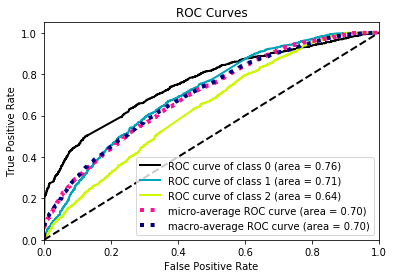

In [186]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV
model =  CalibratedClassifierCV( RandomForestClassifier(n_estimators=400, max_depth=4, random_state=0))
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, tweets.index, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred_2 = model.predict(X_test)
model.score(X_test,y_test)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_2))


import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_pred)
plt.show()

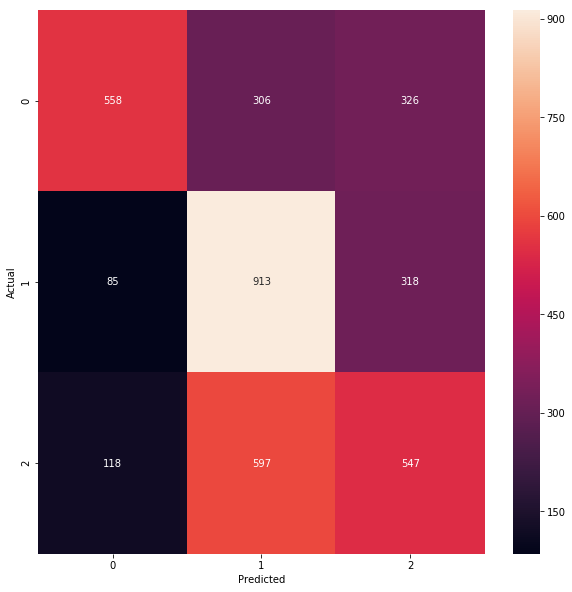

In [112]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

[6 2 3 0 4 2 4 9 1 8 0 5 1 4 0 8 2 3 0 4 0 6 6 5 9 2 0 0 0 1 9 6 4 3 8 4 3
 6 9 8 6 0 0 7 6 3 1 3 8 8 6 6 0 1 8 1 5 7 6 7 9 6 1 9 5 6 1 9 0 2 1 3 6 1
 5 9 1 1 5 0 3 2 1 9 5 6 2 1 8 9 3 2 4 8 4 8 6 3 7 3 4 1 1 4 0 0 7 6 2 9 9
 9 6 0 8 8 9 4 4 0 7 7 7 6 7 1 2 9 9 2 4 4 5 4 2 3 9 8 8 5 1 3 5 2 8 6 0 3
 2 4 4 7 2 4 0 3 0 8 2 4 5 1 9 9 4 6 8 4 6 7 2 0 7 4 8 8 4 2 5 6 0 8 8 9 8
 4 4 5 1 0 5 9 8 3 3 0 3 5 8 2 5 2 7 4 3 4 5 8 0 0 3 4 7 0 5 6 8 9 0 5 5 5
 0 6 6 9 4 7 5 0 9 4 6 6 6 9 4 2 2 5 3 4 9 5 9 7 0 8 1 3 1 1 5 8 7 2 5 0 3
 6 5 9 1 1 0 6 4 6 8 0 3 5 6 8 1 0 8 6 3 8 9 3 9 0 3 3 3 0 1 5 4 7 4 1 0 7
 4 3 4 0 4 8 7 4 4 7 3 8 7 5 2 6 1 9 6 6 2 0 7 3 6 3 7 8 9 8 6 7 4 4 9 2 0
 9 7 1 1 9 5 5 0 7 5 1 8 0 6 2 4 1 0 8 7 4 7 1 9 6 2 3 4 2 8 9 3 2 1 4 2 7
 5 7 3 5 7 0 7 6 1 9 8 2 1 4 7 6 5 4 1 2 8 9 1 7 7 1 3 3 2 1 2 3 0 7 3 7 0
 9 5 3 3 9 7 3 3 6 9 6 1 7 6 0 5 8 5 9 0 7 7 1 0 8 8 4 6 6 5 4 8 5 7 9 5 5
 5 7 8 2 6 1 8 2 8 9 8 8 3 5 1 5 6 4 9 1 9 4 8 7 8 0 7 8 5 3 8 8 2 6 0 7 6
 3 6 0 7 1 4 1 3 7 0 2 8 

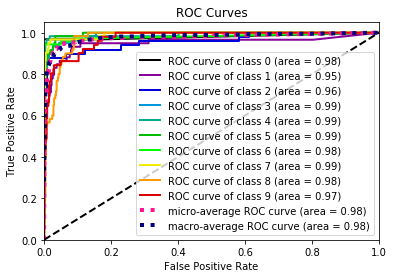

In [134]:
# The usual train-test split mumbo-jumbo
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)
print(y_test)
print(predicted_probas)
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

In [113]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.47      0.57      1190
          1       0.50      0.69      0.58      1316
          2       0.46      0.43      0.45      1262

avg / total       0.56      0.54      0.53      3768



In [114]:
model_2 = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, tweets.index, test_size=0.2, random_state=0)
model_2.fit(X_train, y_train)
y_pred_2 = model.predict(X_test)
model_2.score(X_test,y_test)

0.5368895966029724

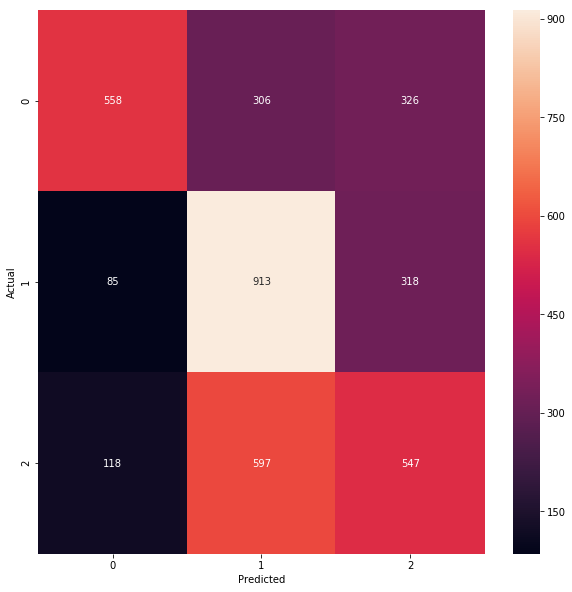

In [115]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.47      0.57      1190
          1       0.50      0.69      0.58      1316
          2       0.46      0.43      0.45      1262

avg / total       0.56      0.54      0.53      3768



C:\Users\matun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\matun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.535828025477707
             precision    recall  f1-score   support

          0       0.71      0.49      0.58      1190
          1       0.51      0.66      0.58      1316
          2       0.45      0.45      0.45      1262

avg / total       0.56      0.54      0.54      3768



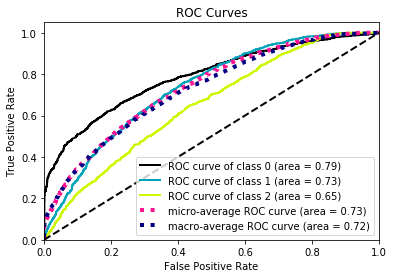

In [175]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = MultinomialNB()
clf2 = LogisticRegression(random_state=0)
clf3 = BernoulliNB(alpha=.01)
eclf = VotingClassifier(estimators=[('MNB', clf1), ('LogReg', clf2), ('Ber', clf3)], voting='soft', weights=[3,2,1])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print(eclf.score(X_test,y_test))

from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

y_pred = eclf.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_pred)
plt.show()


In [40]:
count_vect_2 = CountVectorizer()
X_train_counts_2 = count_vect.fit_transform(X_test)
tfidf_transformer_2 = TfidfTransformer()
X_test_tfidf = tfidf_transformer_2.fit_transform(X_train_counts_2)

print(X_test_tfidf.shape)
print(X_train_tfidf.shape)
#y_pred = eclf.predict(X_test_tfidf)

(4709, 11654)
(14127, 24626)


In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()